***Pontuação anual de Disciplina de História e Geografia*** 

*Testes, exames e notas anuais obtidas pelos alunos do ensino secundário*

Objetivos

Para comparar o desempenho por gênero.
Comparar o desempenho dos alunos no primeiro, segundo e terceiro semestres.
Entender o impacto das notas de testes e exames durante cada semestre nos resultados finais dos alunos.

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [11]:
df = pd.read_csv('df_dados_alunos.csv')

In [13]:
df.head()

,Gender,Test_01,Exam_01,Test_02,Exam_02,Test_03,Exam_03,Annual_Score,Success,Unnamed: 9
0,F,72.50,93.75,81.25,86.25,100.0,86.25,87.36,1,NaN
1,F,68.75,81.25,65.00,56.25,90.0,71.25,71.25,1,NaN
2,F,67.50,58.75,42.50,45.00,85.0,50.00,55.83,1,NaN
3,F,58.75,87.50,75.00,76.25,100.0,81.25,80.42,1,NaN
4,F,90.00,83.75,70.00,93.75,90.0,88.75,86.94,1,NaN


In [15]:
if 'df' in locals():
    print("O DataFrame df está definido!")
else:
    print("O DataFrame df não está definido.")

O DataFrame df está definido!


In [87]:
Gender = df['Gender'].value_counts().reset_index()
Gender

,Gender,count
0,F,438
1,M,196


In [105]:
# Calcular médias e desvios padrão
desempenho = dados.groupby('Gender')['Annual_Score'].agg(['mean', 'std', 'count']).reset_index()
print(desempenho)


  Gender       mean        std  count
0      F  45.593630  17.966769    438
1      M  40.374388  18.408306    196


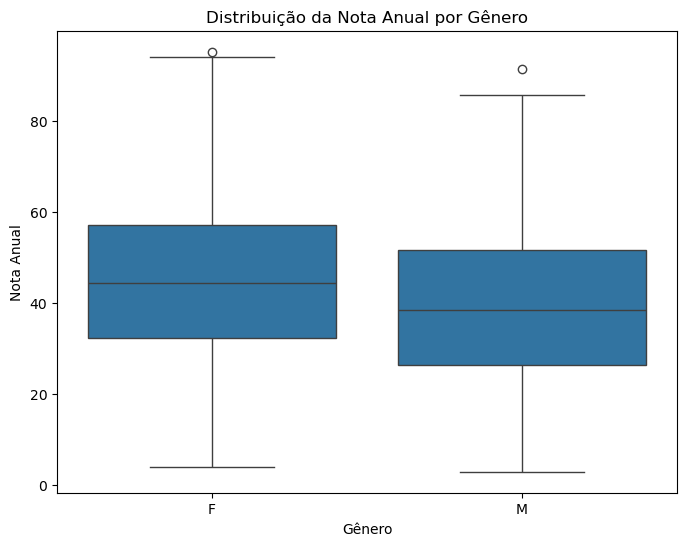

In [109]:
# Boxplot para comparação de distribuições
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Annual_Score', data=dados)
plt.title('Distribuição da Nota Anual por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Nota Anual')
plt.show()

In [27]:
# Definindo as variáveis independentes (X) e transformando a variável dependente (y)
X = dados[['Test_01', 'Exam_01', 'Test_02', 'Exam_02', 'Test_03', 'Exam_03']]
threshold = 50  # Defina o threshold que faz sentido para seus dados
y = (dados['Annual_Score'] > threshold).astype(int)  # Convertendo para classes 0 e 1

In [29]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:

# Criar o modelo de Regressão Logística
model = LogisticRegression()

In [33]:
# Treinar o modelo
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Fazer previsões
y_pred = model.predict(X_test)

In [37]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print('Matriz de Confusão:')
print(cm)
print('Relatório de Classificação:')
print(report)

Acurácia: 0.98
Matriz de Confusão:
[[81  1]
 [ 1 44]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        82
           1       0.98      0.98      0.98        45

    accuracy                           0.98       127
   macro avg       0.98      0.98      0.98       127
weighted avg       0.98      0.98      0.98       127



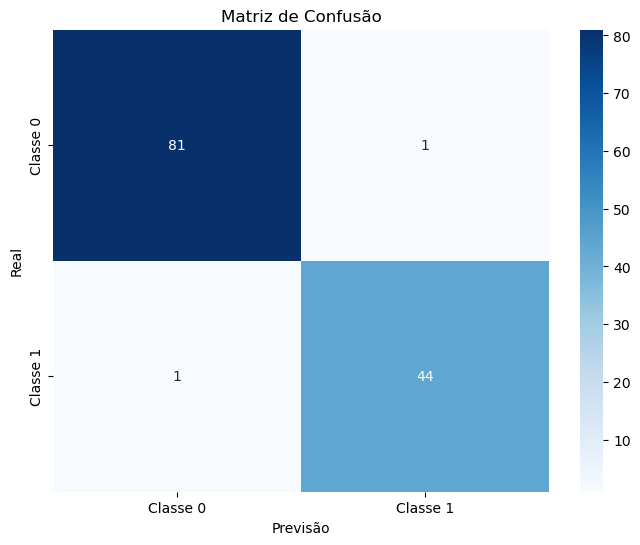

In [79]:
# 2. Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

In [39]:
# Acessar os coeficientes
coeficientes = model.coef_[0]
nomes_variaveis = X.columns

# Criar um DataFrame para visualização
coeficientes_df = pd.DataFrame({'Variável': nomes_variaveis, 'Coeficiente': coeficientes})
print(coeficientes_df)


  Variável  Coeficiente
0  Test_01     0.469967
1  Exam_01     0.924599
2  Test_02     0.486489
3  Exam_02     1.085120
4  Test_03     0.491750
5  Exam_03     0.902443


In [63]:
# Ordenar as variáveis
order = ['Test_01', 'Test_02', 'Test_03', 'Exam_01', 'Exam_02', 'Exam_03']
coeficientes_df['Variável'] = pd.Categorical(coeficientes_df['Variável'], categories=order, ordered=True)
coeficientes_df = coeficientes_df.sort_values(by='Variável')

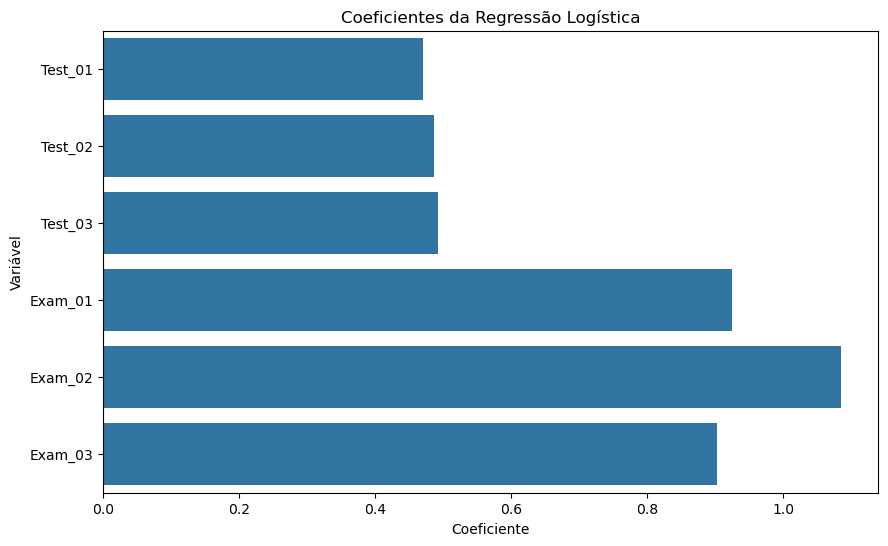

In [77]:
# 1. Gráfico de Coeficientes (sem hue)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variável', data=coeficientes_df)
plt.title('Coeficientes da Regressão Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.axvline(0, color='grey', linestyle='--')
plt.show()

In [119]:
# Calcular a razão de chances
coeficientes_df['Odds_Ratio'] = np.exp(coeficientes_df['Coeficiente'])

print(coeficientes_df[['Variável', 'Odds_Ratio']])


  Variável  Odds_Ratio
0  Test_01    1.599941
2  Test_02    1.626596
4  Test_03    1.635175
1  Exam_01    2.520858
3  Exam_02    2.959795
5  Exam_03    2.465619


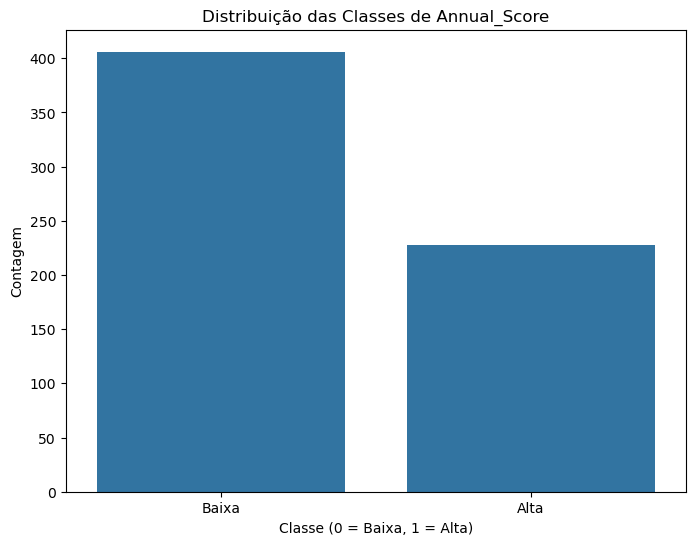

In [81]:
# 3. Gráfico de Distribuição das Classes
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribuição das Classes de Annual_Score')
plt.xlabel('Classe (0 = Baixa, 1 = Alta)')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Baixa', 'Alta'])
plt.show()